In [38]:
import numpy as n
import matplotlib.pyplot as mtp
from matplotlib.colors import ListedColormap as lc 
import pandas as pd 
from sklearn.preprocessing import StandardScaler as ss 
from sklearn.model_selection import train_test_split as tts 
from sklearn.naive_bayes import GaussianNB as gn
from sklearn.metrics import confusion_matrix as c 

In [39]:
# Dataset to determine the effect of Glucose ,Age and BMI on Heart disease   
df = pd.read_csv("healthcare.csv")
df = df.dropna()
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [40]:
X = df.iloc[:,[2,8,9]].values
y = df.iloc[:,4].values


In [41]:
X_train,X_test , y_train , y_test = tts(X,y,random_state=4)

In [42]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
cl = gn()
cl.fit(X_train,y_train)


GaussianNB()

In [44]:
y_pred = cl.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [45]:
cm = c(y_test,y_pred)
print(cm)

[[1115   44]
 [  51   18]]


In [46]:
X_set , y_set = X_train , y_train
X1,X2 = n.meshgrid(n.arange(start= X_set[:,0].min()-1,
                            stop=X_set[:,0].max()+1,
                            step = 0.01),
                   n.arange(start= X_set[:,1].min()-1,
                            stop=X_set[:,1].max()+1,
                            step = 0.01))
Z = cl.predict(n.array([X1.ravel(), X2.ravel(),
                         n.zeros_like(X1.ravel())]).T)
Z = Z.reshape(X1.shape)

/var/folders/ys/f1dtzjmj589424_wn9_wp8t80000gn/T/ipykernel_88025/990734217.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


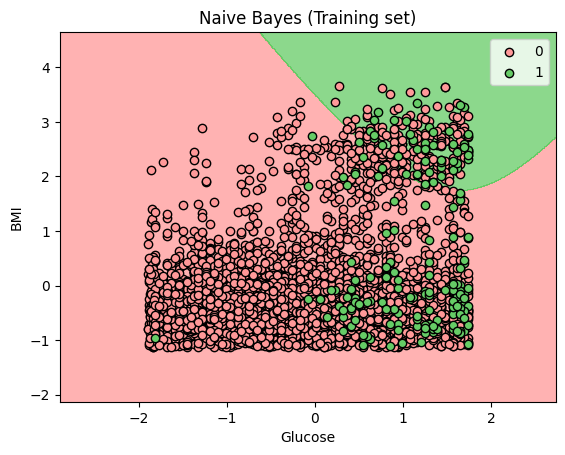

In [47]:
cmap = lc(['#FF9999', '#66CC66'])
mtp.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

# Setting plot limits and labels
mtp.xlim(X1.min(), X1.max())
mtp.ylim(X2.min(), X2.max())

# Plotting the actual data points with different colors for different classes
for i, j in enumerate(n.unique(y_set)):
    mtp.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=cmap(i), label=j , marker='o' , edgecolors= 'k')

mtp.title('Naive Bayes (Training set)')
mtp.xlabel('Glucose')
mtp.ylabel('BMI')
mtp.legend()
mtp.show()